# End to End Machine Learning Project - Titanic Predictive Model
##### By: Sebastian Salazar

## (A) Framing the problem

For the following assignment I chose to use the classic Titanic Passager database in order to develop a classification machine learning model that predicts if a passanger will survive or not based on its characteristics. 

Performance of the model will be centered on the accuracy of the predictions with the support of a confusion matrix.

## (B) Data Acquisition

The selected database can be found on Kaggle under the following URL:
https://www.kaggle.com/c/titanic/overview

*Note: Kaggle provides to databases 'train' and 'test'. Since survability is not given in thes test dataset (for competition purposes) that whole pipeline will be done with the train dataset.*

(i) Load required libraries

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Pandas
import pandas as pd

(ii) Load dataset

In [2]:
titanic=pd.read_csv('train.csv', index_col='PassengerId')

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Hence, the titanic dataset contains the following passenger information:
- Survived: 1 if the passenger survived, 0 if not
- Pclass: Number of the class the passenger belonged to
- Name: Name of the passenger
- Sex: Sex of the passenger
- Age: Age of the passenger when Titanic sank
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket code
- Fare: Ticket price
- Cabin: Cabin number
- Embarked: Port of Embarkation	

## (C) Initial Data Exploration

#### (i) Data types and null values

We validate the database data types and also find out the  following variables have null values which will be dealt with later:
- Age
- Cabin
- Embarked

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### (ii) Categorical variables

Categorical variables like: Name, Ticket, will be ignored as they may not add to the ML model.

Cabin has a high dimensionality but insights can be acquired from the cabin letter. Missing values will be treated a cabin M.

In [4]:
titanic['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F2             3
              ..
A14            1
D6             1
D11            1
A7             1
E40            1
Name: Cabin, Length: 147, dtype: int64

In [5]:
titanic['Deck'] = titanic['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

titanic['Deck'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [6]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### (iii) Numerical variables

For numerical variables we calculate their main statistics:

In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We notice from our exploration that the average passenger in the Titanic did not survived was around the age of 30, travelled without family.

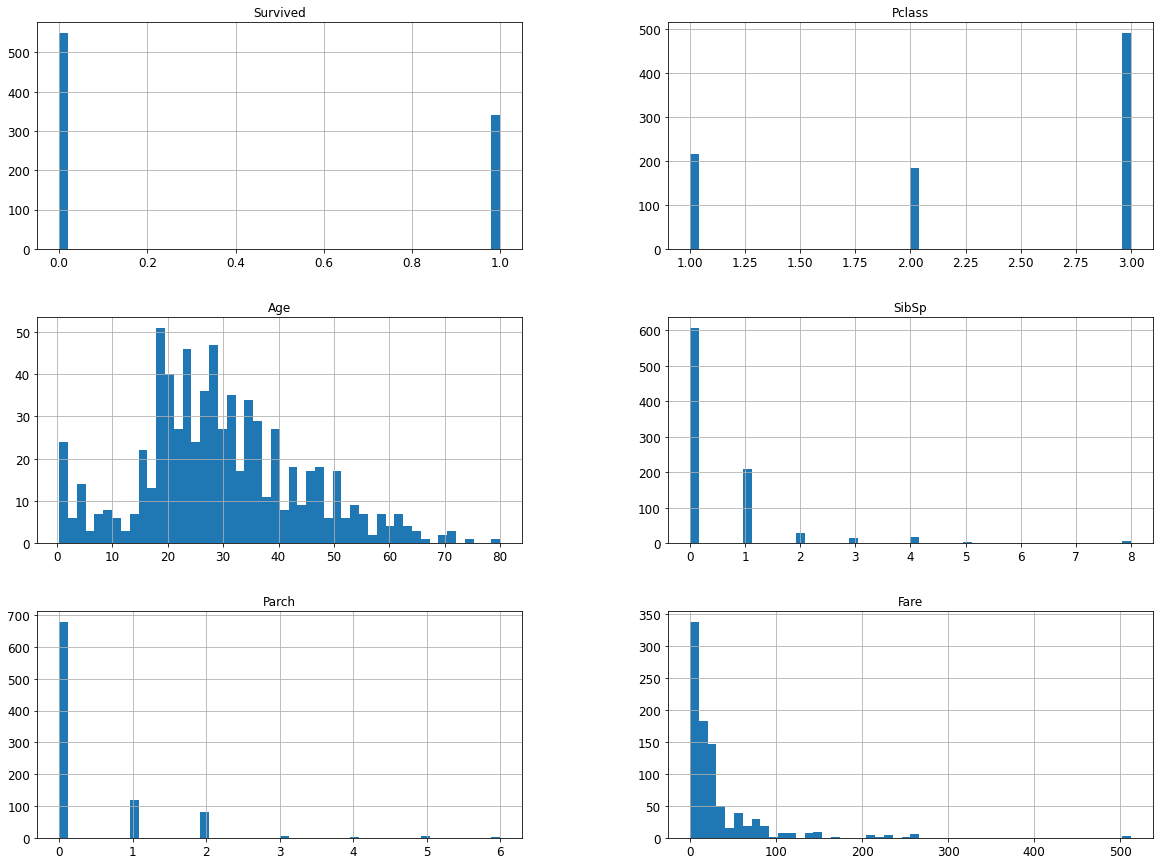

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

## (D) Train/test split

We will do the train/test split using SkLearn with a random_state of 5 and a test size of 20%

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(titanic, test_size=0.2, random_state=5)

In [10]:
print('Train dataset has',len(train_set),'passengers:')
display(train_set.head())

print('Test dataset has',len(test_set),'passengers:')
display(test_set.head())

Train dataset has 712 passengers:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S,M
480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S,M
135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S,M
589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S,M


Test dataset has 179 passengers:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q,M
355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,M
591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S,M
510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,M
770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S,M


## (E) Test data Exploration for Insights

In [11]:
df = train_set.copy()

#### (i) Trend graphs VS Target variable

Younger people had greater chances of surviving

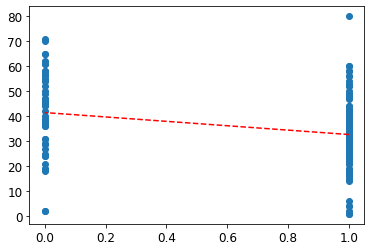

In [12]:
df.dropna(inplace=True) # NANs are dropped so trendline can be calculated for plotting purposes

x=df['Survived']
y=df['Age']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

Passangers that payed higher fares has greater chances to survive. This could also be related to priorities in evacuation.

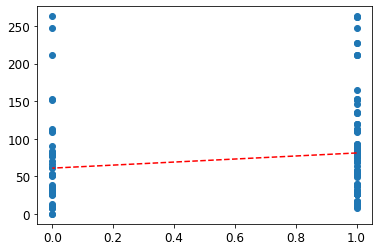

In [13]:
x=df['Survived']
y=df['Fare']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

Passangers with family or relatives aboard that higher survivability chances

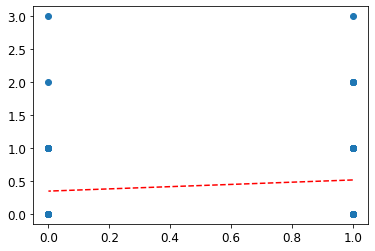

In [14]:
x=df['Survived']
y=df['SibSp']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

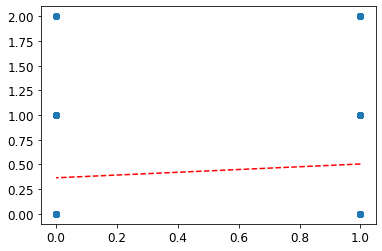

In [15]:
x=df['Survived']
y=df['Parch']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#### (ii) Correlation Analysis

In [16]:
df = train_set.copy()

corr_matrix = df.corr()

print('Dataset correlation matrix:')
display(corr_matrix)

Dataset correlation matrix:


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.321107,-0.098872,-0.033364,0.091518,0.266867
Pclass,-0.321107,1.000000,-0.361616,0.080620,0.027607,-0.611577
Age,-0.098872,-0.361616,1.000000,-0.308742,-0.173515,0.088229
SibSp,-0.033364,0.080620,-0.308742,1.000000,0.389958,0.190494
Parch,0.091518,0.027607,-0.173515,0.389958,1.000000,0.228438
Fare,0.266867,-0.611577,0.088229,0.190494,0.228438,1.000000


In [17]:
print('Correlation vs target variable (Survived):')
corr_matrix['Survived'].sort_values(ascending=False)

Correlation vs target variable (Survived):


Survived    1.000000
Fare        0.266867
Parch       0.091518
SibSp      -0.033364
Age        -0.098872
Pclass     -0.321107
Name: Survived, dtype: float64

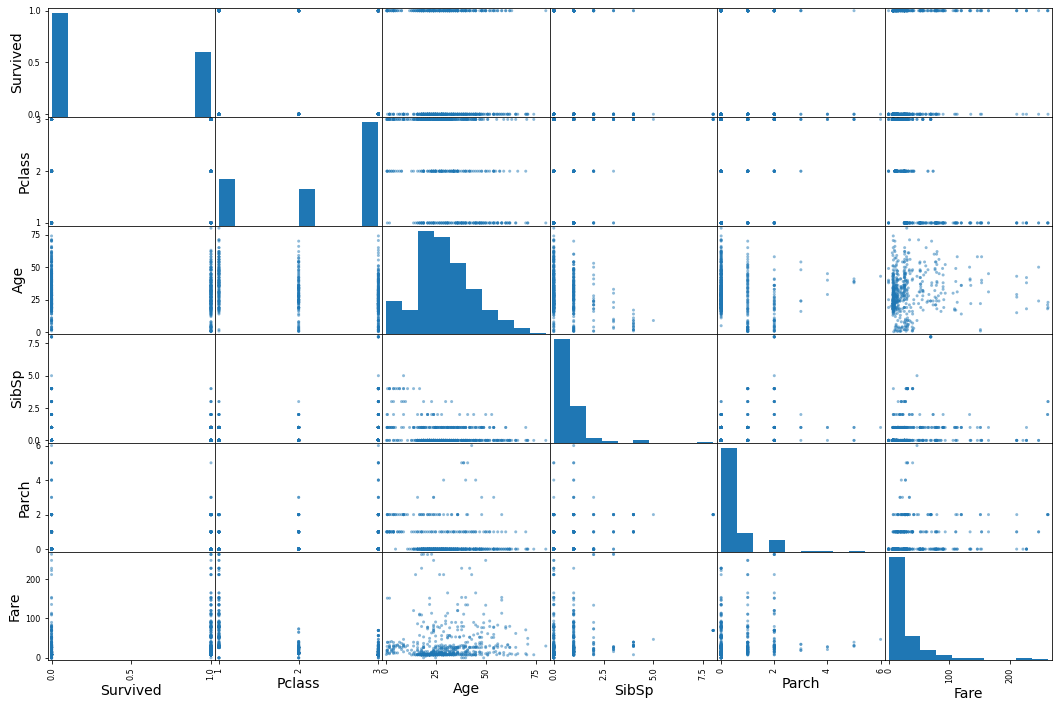

In [18]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['Survived', 'Pclass','Age','SibSp','Parch','Fare']], figsize=(18, 12));

We already used describe() for the full dataset, but let's reapply it for our test dataset

In [19]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,565.000000,712.000000,712.000000,712.000000
mean,0.384831,2.306180,30.063575,0.512640,0.387640,31.247037
std,0.486897,0.844651,14.740857,1.079072,0.813918,42.114827
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.750000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


## (F) Data Profiling

Alternatively we can use pandas-profiling to get an extensive report of our data

In [20]:
#pip install pandas-profiling
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file(output_file='output.html')
prof

## (G) Modelling

First we choose the data, target variable and predictors. The pipelines are trained over the full dataset to avoid train data bias

In [21]:
df = titanic.copy()

num_attribs = ['Pclass','Age','SibSp','Parch','Fare']
cat_attribs = ['Sex','Embarked','Deck']

X=df[['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked','Deck']]
y=df['Survived']

Next, we run the pipeline over the data

In [22]:
# Define pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Numerical pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Categorical pipeline
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('OHE', OneHotEncoder()),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [23]:
full_pipeline.fit_transform(X)

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
df = train_set.copy()

X_train=df[['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked','Deck']]
y_train=df['Survived']

X_train_prepared = full_pipeline.transform(X_train)

Then, we select the model and fit

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
GB=GradientBoostingClassifier(random_state=10)
model=GB.fit(X_train_prepared,y_train)

y_train_pred=model.predict(X_train_prepared)

Finally we process the test dataset to validate if our model has good predictive power

In [27]:
# Define x and y
df_test= test_set.copy()
X_test=df_test[['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked','Deck']]
y_test=df_test['Survived']

# Preprocessing pipeline
X_test_prepared = full_pipeline.transform(X_test)

# Predict with trained model
from sklearn.metrics import accuracy_score
from sklearn import metrics

y_test_pred=model.predict(X_test_prepared)
print('Model accuracy is:',round(accuracy_score(y_test,y_test_pred)*100,2),'%')
print('Precision score:',round(metrics.precision_score(y_test, y_test_pred)*100,2),'%')
print('Recall score:',round(metrics.recall_score(y_test, y_test_pred)*100,2),'%')

Model accuracy is: 83.8 %
Precision score: 85.45 %
Recall score: 69.12 %


Confusion matrix for our model

In [28]:
from sklearn import metrics

# Confusion matrix with label
display(pd.DataFrame(metrics.confusion_matrix(y_test,y_test_pred, labels=[0,1]),index=['true:0','true:1'],columns=['pred:0','pred:1']))

,pred:0,pred:1
true:0,103,8
true:1,21,47


## (H) Model Fine tuning

Since we will use cross validation for GridSearch we need to run the pipeline over the full dataset

In [29]:
df = titanic.copy()

num_attribs = ['Pclass','Age','SibSp','Parch','Fare']
cat_attribs = ['Sex','Embarked','Deck']

X=df[['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked','Deck']]
y=df['Survived']

In [30]:
# Define pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Numerical pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Categorical pipeline
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('OHE', OneHotEncoder()),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)

Calculate best parameters

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [100,1000], 
               'max_features': ['auto'],
               'max_depth':[3,4,5],
               'min_samples_split':[5,6],
               'min_samples_leaf':[3,6]}
             ]

model1 = GradientBoostingClassifier(random_state=10)

grid_search = GridSearchCV(model1, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(X_prepared, y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             param_grid=[{'max_depth': [3, 4, 5], 'max_features': ['auto'],
                          'min_samples_leaf': [3, 6],
                          'min_samples_split': [5, 6],
                          'n_estimators': [100, 1000]}],
             return_train_score=True, scoring='accuracy')

In [32]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=5, max_features='auto', min_samples_leaf=6,
                           min_samples_split=5, random_state=10)

Run the model with the best parameters

The model accuracy, precision and recall increased slightly

## (I) Kaggle predictions

In [33]:
# Define x and y
df_test=pd.read_csv('test.csv', index_col='PassengerId')
df_test['Deck'] = df_test['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

X_test=df_test[['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked','Deck']].copy()

# Preprocessing pipeline
X_test_prepared = full_pipeline.transform(X_test)

# Predict with trained model
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_test_pred=grid_search.predict(X_test_prepared)
y_test_pred=pd.DataFrame(data=y_test_pred,index=df_test.index,columns=["Survived"])

In [34]:
y_test_pred.to_csv('test_results.csv')